In [40]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
from bs4 import BeautifulSoup
import glob

In [65]:
desc_text = []

In [66]:
def filter_description(desc):
    content = desc.split("\nInput\n")[0]
    content = " ".join(content.split())
    content = content.lower()
    content = content.replace("write a program", "")
    return content

In [67]:
# use glob to get a list of files that contain the HtML extension.
# for file in glob.glob(r"D:\defence_data\Project_CodeNet\problem_descriptions/*.html"):
#     with open(file,"r",encoding="utf8") as f:
#         soup = BeautifulSoup(f,"html.parser")
#           # Extract the text from the HTML
#         text = soup.get_text()
#         desc_text.append(filter_description(text))
for file in glob.glob(r"D:\defence_data\Project_CodeNet\problem_descriptions\*.html"):
    with open(file,"r",encoding="utf8") as f:
        filename = f.name.split('\\')[-1]

        soup = BeautifulSoup(f,"html.parser")
          # Extract the text from the HTML
        text = soup.get_text()
        desc_text.append([filter_description(text), filename])

In [68]:
# Create a DataFrame to store the text
df = pd.DataFrame(desc_text, columns=["description",'file_name'])

In [69]:
df.head()

,description,file_name
0,qq which prints multiplication tables in the ...,p00000.html
1,list of top 3 hills there is a data which prov...,p00001.html
2,digit number which computes the digit number ...,p00002.html
3,is it a right triangle? which judges wheather...,p00003.html
4,simultaneous equation which solve a simultane...,p00004.html


In [70]:
filter_description(df.description[0])

'qq which prints multiplication tables in the following format: 1x1=1 1x2=2 . . 9x8=72 9x9=81'

In [71]:
df.shape

(3999, 2)

In [72]:
import re
# Remove numbers from text
df['description'] = df['description'].apply(lambda x: re.sub(r'\d+', '', x))

In [73]:
df['description'] = df['description'].apply(lambda x: re.sub(r'[\d+\+\-\*\/]+', '', x))

In [74]:
df['description'] = df['description'].str.replace('=', '', regex=True)

In [75]:
df['description'][0]

'qq  which prints multiplication tables in the following format: x x . . x x'

In [76]:
new_df = pd.DataFrame()

In [77]:
new_df = df[df['description'].map( lambda x : x.isascii())]

In [78]:
df.shape

(3999, 2)

In [79]:
new_df.shape

(1869, 2)

In [80]:
import spacy

In [81]:
spacy__ = spacy.load("en_core_web_sm")
stop_words = spacy__.Defaults.stop_words
#print(stop_words)

In [82]:
import string
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [83]:
# creating our tokenizer function 
def spacy_tokenizer(sentence):
    # creating our token object which is used to create documents with linguistic annotations 
    doc = spacy__(sentence)
    # lemmatizing each token and converting it into lowercase 
    my_token = [word.lemma_.lower().strip() for word in doc]     # strip is used to remove the space in between 
    #print(my_token)
    
    # removing stop words 
    final_tokens = [word for word in my_token if word not in stop_words and word not in punctuations]
    #print(final_tokens)
    return final_tokens

In [84]:
new_df['tokens'] = 0

C:\Users\Hp\AppData\Local\Temp\ipykernel_34364\3515898356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tokens'] = 0


In [85]:
new_df.isnull().value_counts()

description  file_name  tokens
False        False      False     1869
dtype: int64

In [86]:
new_df['description'][0]

'qq  which prints multiplication tables in the following format: x x . . x x'

In [87]:
new_df['tokens'] = new_df['description'].apply(spacy_tokenizer)

C:\Users\Hp\AppData\Local\Temp\ipykernel_34364\3449493323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tokens'] = new_df['description'].apply(spacy_tokenizer)


In [88]:
new_df['tokens'][0]

['qq',
 'print',
 'multiplication',
 'table',
 'follow',
 'format',
 'x',
 'x',
 'x',
 'x']

In [89]:
set(new_df['tokens'][0])

{'follow', 'format', 'multiplication', 'print', 'qq', 'table', 'x'}

In [90]:
def filter_array(word_array):
    filtered_list = []
    for element in word_array:
        if(len(element)>=3):
            filtered_list.append(element)
    return filtered_list

In [91]:
new_df['tokens'] = new_df['tokens'].apply(lambda word_array: filter_array(word_array))

C:\Users\Hp\AppData\Local\Temp\ipykernel_34364\646937507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tokens'] = new_df['tokens'].apply(lambda word_array: filter_array(word_array))


In [92]:
new_df['tokens'][0]

['print', 'multiplication', 'table', 'follow', 'format']

In [93]:
new_df.shape

(1869, 3)

In [94]:
new_df

,description,file_name,tokens
0,qq which prints multiplication tables in the ...,p00000.html,"[print, multiplication, table, follow, format]"
1,list of top hills there is a data which provi...,p00001.html,"[list, hill, datum, provide, height, meter, mo..."
2,digit number which computes the digit number ...,p00002.html,"[digit, number, compute, digit, number, sum, i..."
3,is it a right triangle? which judges wheather...,p00003.html,"[right, triangle, judge, wheather, length, for..."
5,gcd and lcm which computes the greatest commo...,p00005.html,"[gcd, lcm, compute, great, common, divisor, gc..."
...,...,...,...
3960,score : points problem statementfor integers ...,p04014.html,"[score, point, problem, statementfor, integer,..."
3961,score : points problem statementtak has n car...,p04015.html,"[score, point, problem, statementtak, card, it..."
3962,score : points problem statementfor integers ...,p04016.html,"[score, point, problem, statementfor, integer,..."
3963,score : points problem statementn hotels are ...,p04017.html,"[score, point, problem, statementn, hotel, loc..."


In [95]:
new_df["description"] = new_df["tokens"].apply(lambda x: " ".join(x))

C:\Users\Hp\AppData\Local\Temp\ipykernel_34364\3822993979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["description"] = new_df["tokens"].apply(lambda x: " ".join(x))


In [96]:
new_df.drop(columns=["tokens"], inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_34364\4241959617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=["tokens"], inplace=True)


In [97]:
new_df.sample(10)

,description,file_name
896,problem weak plan committee member kitoshima p...,p00896.html
2884,score point problem statementgiven integer fin...,p02938.html
3313,score point problem statementsnuke integer seq...,p03367.html
2564,problem statementatcoder currently host type c...,p02618.html
1102,identical program programming contest concours...,p01102.html
2970,score point problem statementtakahashi compete...,p03024.html
3104,score point problem statementthere card ith ca...,p03158.html
2881,score point problem statementyou pot ingredien...,p02935.html
1890,nonredundant drive people jag kingdom hate red...,p01890.html
3259,score point problem statementthere integer seq...,p03313.html


In [98]:
import re

regex = re.compile('[^a-zA-Z]')

In [99]:
new_df["description"] = new_df["description"].apply(lambda x: regex.sub(' ', x))

C:\Users\Hp\AppData\Local\Temp\ipykernel_34364\4209715039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["description"] = new_df["description"].apply(lambda x: regex.sub(' ', x))


In [100]:
new_df.sample(5)

,description,file_name
3314,score point problem statementsnuke rooted tree...,p03368.html
855,problem prime gap sequence consecutive composi...,p00855.html
1511,threeway branch grid consist times cell upper...,p01511.html
2457,set range search set integer perform sequence ...,p02457.html
2997,score point problem statementthe beauty sequen...,p03051.html


In [101]:
new_df["description"] = new_df["description"].apply(lambda x: " ".join(x.split()))

C:\Users\Hp\AppData\Local\Temp\ipykernel_34364\3565973167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["description"] = new_df["description"].apply(lambda x: " ".join(x.split()))


In [102]:
new_df.to_csv("problem_description.csv", index=False)

---
# After filtering
---

In [1]:
!pip install sent2vec
from sent2vec.vectorizer import Vectorizer

C:\Users\Hp\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\Hp\anaconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

In [3]:
new_df = pd.read_csv("problem_description.csv")

In [4]:
new_df.sample(5)

,description,file_name
828,set symmetric difference find symmetric differ...,p02466.html
445,problem exciting bicycle happen special bicycl...,p01576.html
535,problem vector field jag jagan acceleration gr...,p01820.html
1306,score point problem statementwe apple piece ap...,p03029.html
1241,score point problem statementgiven string char...,p02960.html


In [5]:
new_df['description'].isnull().sum()

3

In [6]:
new_df = new_df.dropna()

In [7]:
new_df = new_df.reset_index(drop=True)
new_df.sample(5)

,description,file_name
975,score point problem statement grass field stre...,p02680.html
960,score point problem statementfor string consis...,p02664.html
751,cubic calculate cube integer,p02388.html
1547,score point problem statementyou integer seque...,p03308.html
291,short common nonsubsequence subsequence sequen...,p00971.html


In [8]:
new_df['description'].isnull().sum()

0

In [9]:
sentences = new_df.description.to_list()

In [10]:
sentences[:10]

['print multiplication table follow format',
 'list hill datum provide height meter mountain data mountain print height mountain descend order',
 'digit number compute digit number sum integer',
 'right triangle judge wheather length form right triangle print yes integer form right triangle',
 'gcd lcm compute great common divisor gcd common multiple lcm',
 'reverse sequence reverse string str',
 'debt hell friend live undisclosed country involve debt borrow yen loan shark loan shark add interest debt round near week week compute debt week',
 'prime number read integer print number prime number equal prime number natural number exactly distinct natural number divisor example prime number',
 'circumscribe circle triangle print central coordinate p x p y radius circumscribed circle triangle construct point y y y plane surface',
 'draw lot let play amidakuji follow example vertical line horizontal line horizontal line intersect jump vertical line starting point figure number assign vertic

In [11]:
new_df.sample(5)

,description,file_name
422,problem rabbit game play honestly rabbit matte...,p01499.html
786,enumeration subset print subset set contain el...,p02427.html
978,score point problemtakahashi novice competitiv...,p02683.html
225,problem man japanese alp experienced climber p...,p00888.html
1045,score point problem statementtakahashi string ...,p02756.html


In [12]:
from gensim.test.utils import common_texts

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [13]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]

model = Doc2Vec(documents, vector_size=10, window=5, min_count=1, workers=4)

In [14]:
new_df["description"]

0                print multiplication table follow format
1       list hill datum provide height meter mountain ...
2           digit number compute digit number sum integer
3       right triangle judge wheather length form righ...
4       gcd lcm compute great common divisor gcd commo...
                              ...                        
1861    score point problem statementfor integer geq g...
1862    score point problem statementtak card ith leq ...
1863    score point problem statementfor integer geq g...
1864    score point problem statementn hotel locate st...
1865    score point problem statementlet string length...
Name: description, Length: 1866, dtype: object

In [15]:
# Create a new column 'vector' with list of strings
new_df["vector"] = new_df["description"].apply(lambda x: x.split())

In [16]:
new_df["vector"]

0          [print, multiplication, table, follow, format]
1       [list, hill, datum, provide, height, meter, mo...
2       [digit, number, compute, digit, number, sum, i...
3       [right, triangle, judge, wheather, length, for...
4       [gcd, lcm, compute, great, common, divisor, gc...
                              ...                        
1861    [score, point, problem, statementfor, integer,...
1862    [score, point, problem, statementtak, card, it...
1863    [score, point, problem, statementfor, integer,...
1864    [score, point, problem, statementn, hotel, loc...
1865    [score, point, problem, statementlet, string, ...
Name: vector, Length: 1866, dtype: object

In [17]:
# Apply the infer_vector method
new_df["vector"] = new_df["vector"].apply(lambda x: model.infer_vector(x))

In [18]:
new_df['vector']

0       [0.009234345, -0.010879618, 0.026482582, 0.020...
1       [0.026413238, 0.011615336, 0.04848246, -0.0299...
2       [-0.007398677, -0.031962447, -0.032004118, -0....
3       [0.040342588, 0.019989837, -0.01113669, 0.0271...
4       [-0.009106621, -0.017478928, 0.0107598305, -0....
                              ...                        
1861    [-0.35240358, -0.24830385, 0.10549152, -0.3510...
1862    [-0.29569134, -0.2507222, 0.09667694, -0.11594...
1863    [-0.31034467, -0.1845481, 0.06541865, -0.41682...
1864    [-0.5184152, -0.62531483, 0.11564115, -0.60316...
1865    [-0.4267465, -0.3507212, 0.15747753, -0.361855...
Name: vector, Length: 1866, dtype: object

In [19]:
new_df

,description,file_name,vector
0,print multiplication table follow format,p00000.html,"[0.009234345, -0.010879618, 0.026482582, 0.020..."
1,list hill datum provide height meter mountain ...,p00001.html,"[0.026413238, 0.011615336, 0.04848246, -0.0299..."
2,digit number compute digit number sum integer,p00002.html,"[-0.007398677, -0.031962447, -0.032004118, -0...."
3,right triangle judge wheather length form righ...,p00003.html,"[0.040342588, 0.019989837, -0.01113669, 0.0271..."
4,gcd lcm compute great common divisor gcd commo...,p00005.html,"[-0.009106621, -0.017478928, 0.0107598305, -0...."
...,...,...,...
1861,score point problem statementfor integer geq g...,p04014.html,"[-0.35240358, -0.24830385, 0.10549152, -0.3510..."
1862,score point problem statementtak card ith leq ...,p04015.html,"[-0.29569134, -0.2507222, 0.09667694, -0.11594..."
1863,score point problem statementfor integer geq g...,p04016.html,"[-0.31034467, -0.1845481, 0.06541865, -0.41682..."
1864,score point problem statementn hotel locate st...,p04017.html,"[-0.5184152, -0.62531483, 0.11564115, -0.60316..."


In [20]:
from sklearn.cluster import KMeans

In [21]:
import numpy as np

In [22]:
X = np.array(new_df["vector"].to_list())
X

array([[ 9.23434459e-03, -1.08796181e-02,  2.64825821e-02, ...,
        -4.49086726e-02, -1.09776855e-04,  2.79796012e-02],
       [ 2.64132377e-02,  1.16153359e-02,  4.84824590e-02, ...,
        -1.27114924e-02,  4.44795471e-03,  4.66425493e-02],
       [-7.39867706e-03, -3.19624469e-02, -3.20041180e-02, ...,
        -2.06239764e-02,  1.09829311e-03, -1.29661560e-02],
       ...,
       [-3.10344666e-01, -1.84548095e-01,  6.54186532e-02, ...,
         4.06804562e-01,  5.09673450e-03, -3.25966217e-02],
       [-5.18415213e-01, -6.25314832e-01,  1.15641147e-01, ...,
         7.56567061e-01, -1.45539746e-01,  3.05266440e-01],
       [-4.26746488e-01, -3.50721210e-01,  1.57477528e-01, ...,
         3.80811036e-01, -2.22722784e-01,  1.44741619e-02]], dtype=float32)

In [23]:
n_clusters = 15

In [24]:
kmeans = KMeans(n_clusters=n_clusters).fit(X)
kmeans

KMeans(n_clusters=15)

In [25]:
labels = kmeans.labels_
labels

array([ 6,  6,  6, ..., 11,  1,  8])

In [26]:
new_df['kmean'] = kmeans.labels_

In [48]:
new_df['kmean'].value_counts()

6     778
0     353
3     167
4     161
9     114
8      83
11     73
13     41
7      30
10     26
2      14
1      12
5      10
14      3
12      1
Name: kmean, dtype: int64

In [49]:
new_df.sample(5)

,description,file_name,vector,kmean
1496,score point problem statementa sequence a a a ...,p03246.html,"[-0.22555813, -0.1421677, -0.011371472, -0.133...",9
78,problem old bridge long long ago thief look tr...,p00638.html,"[0.036546804, -0.046100445, 0.003640008, -0.02...",6
1060,score point problem statement immigration offi...,p02772.html,"[-0.06542057, 0.0037168674, -0.0056949486, -0....",6
1749,score point problem statementthere ball xyplan...,p03598.html,"[-0.25471082, -0.18390967, 0.0772248, -0.18583...",8
729,minimum span tree find sum weight edge minimum...,p02364.html,"[-0.01466172, 0.03547148, 0.021347249, -0.0265...",6


In [50]:
new_df[new_df["kmean"]==7]

,description,file_name,vector,kmean
296,rank finite field consist element addition mul...,p00976.html,"[-0.32567176, -0.47249138, -0.12888825, -0.368...",7
492,problem statement rectangular board square cel...,p01685.html,"[-0.5021161, -0.55224615, 0.051029056, -0.3605...",7
512,cube coloring problem statement great painter ...,p01781.html,"[-0.5162827, -0.54096425, 0.079851285, -0.3655...",7
541,problem black company jag company sweatshop sw...,p01827.html,"[-0.45418477, -0.59255916, -0.09895095, -0.456...",7
560,pipe fitter fierce dog proud pipe fitter icpc ...,p01887.html,"[-0.3717778, -0.47235778, 0.0034017023, -0.317...",7
574,permutation period permutation integer initial...,p01955.html,"[-0.5074606, -0.47965991, -0.0120594725, -0.45...",7
639,insertion sort insertion sort algorithm sort s...,p02255.html,"[-0.4692306, -0.50614333, -0.028024584, -0.309...",7
642,bubble sort bubble sort algorithm sort sequenc...,p02259.html,"[-0.4344186, -0.5742153, 0.071406394, -0.33346...",7
643,stable sort let arrange deck card totally card...,p02261.html,"[-0.47379458, -0.57735425, -0.08546483, -0.479...",7
655,number inversion sequence a a n number pair j ...,p02274.html,"[-0.5997309, -0.5865893, 0.03796968, -0.373070...",7


In [51]:
new_df[new_df["kmean"]==14].sample()

,description,file_name,vector,kmean
1495,score point problem statementsnuke introduce r...,p03245.html,"[-1.1763501, -0.50947344, 0.065341294, -0.3840...",14


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
value_counts = new_df['kmean'].value_counts()

In [92]:
a = pd.DataFrame()

In [93]:
for value,counts in value_counts.items():
    a.apply(lambda )
    print(value,counts)

6 778
0 353
3 167
4 161
9 114
8 83
11 73
13 41
7 30
10 26
2 14
1 12
5 10
14 3
12 1


In [94]:
a

,Value,Coumts
0,12,1


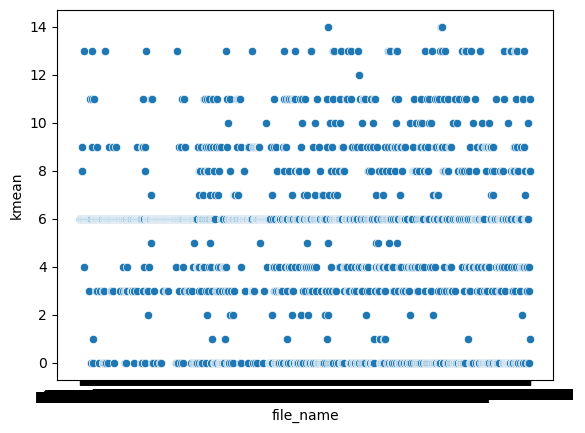

In [38]:
sns.barplot(x=index, y=value)
plt.show()

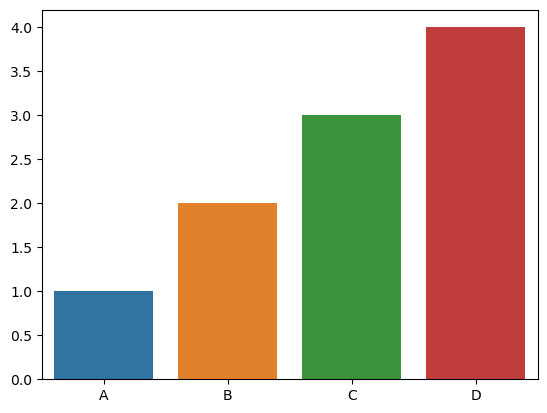

In [39]:
data = {'x': ['A', 'B', 'C', 'D'], 'y': [1, 2, 3, 4]}

# Create the bar plot
sns.barplot(x='x', y='y', data=data)

# Show the plot
plt.show()